In [1]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

2024-01-12 16:14:55.287721: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 16:14:55.503283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-12 16:14:55.503340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-12 16:14:55.552187: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-12 16:14:55.639885: I tensorflow/core/platform/cpu_feature_guar

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [4]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2024-01-12 16:15:00.462812: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-12 16:15:00.564644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-12 16:15:00.564855: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


2024-01-12 16:15:02.353599: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-12 16:15:03.226056: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efed9886100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-12 16:15:03.226090: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2024-01-12 16:15:03.238079: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705056303.364904  121061 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 [==============================] - 9s 7ms/step - loss: 0.2094 - accuracy: 0.9372 - val_loss: 0.0800 - val_accuracy: 0.9772
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0510 - val_accuracy: 0.9857
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0468 - val_accuracy: 0.9854
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0409 - val_accuracy: 0.9887


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


In [9]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

1/1 [==============================] - 0s 361ms/step
Skipping visualization for layer 5 due to unexpected shape: (1, 576)
Skipping visualization for layer 6 due to unexpected shape: (1, 64)
Skipping visualization for layer 7 due to unexpected shape: (1, 10)


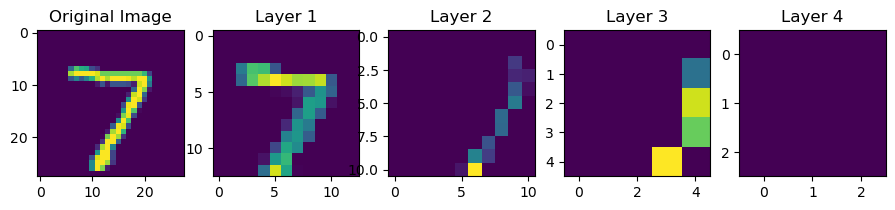

In [10]:
sample_image = test_images[0]
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
sample_label = np.argmax(test_labels[0])

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(sample_image)

plt.figure(figsize=(20, 20))
plt.subplot(1, len(activations) + 1, 1)
plt.imshow(sample_image[0, :, :, 0], cmap='viridis')
plt.title('Original Image')

for i, activation in enumerate(activations[1:]):
    if len(activation.shape) == 4:  
        plt.subplot(1, len(activations) + 1, i + 2)
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
        plt.title(f'Layer {i + 1}')
    else:
        print(f"Skipping visualization for layer {i + 1} due to unexpected shape: {activation.shape}")

plt.show()

# Pytorch

In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
torch.cuda.is_available()

False

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
num_epochs = 5
batch_size = 64
learning_rate = 0.001

In [15]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

In [16]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
print("Training size: ", len(train_loader))
print("Image Dims: ", train_dataset[0][0].size())

Training size:  938
Image Dims:  torch.Size([1, 28, 28])


In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.ReLU()
        )
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [18]:
model = CNN().to(device)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        # print ("Dims : ", images.size()) # Size is [64, 1, 28, 28]
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item(): .4f}')

Epoch [1/5], Step [100/938], Loss:  0.4067
Epoch [1/5], Step [200/938], Loss:  0.1436
Epoch [1/5], Step [300/938], Loss:  0.1264
Epoch [1/5], Step [400/938], Loss:  0.0579
Epoch [1/5], Step [500/938], Loss:  0.0199
Epoch [1/5], Step [600/938], Loss:  0.0306
Epoch [1/5], Step [700/938], Loss:  0.0333
Epoch [1/5], Step [800/938], Loss:  0.0110
Epoch [1/5], Step [900/938], Loss:  0.0141
Epoch [2/5], Step [100/938], Loss:  0.0237
Epoch [2/5], Step [200/938], Loss:  0.0028
Epoch [2/5], Step [300/938], Loss:  0.0398
Epoch [2/5], Step [400/938], Loss:  0.0966
Epoch [2/5], Step [500/938], Loss:  0.0126
Epoch [2/5], Step [600/938], Loss:  0.0599
Epoch [2/5], Step [700/938], Loss:  0.1284
Epoch [2/5], Step [800/938], Loss:  0.0275
Epoch [2/5], Step [900/938], Loss:  0.1057
Epoch [3/5], Step [100/938], Loss:  0.0788
Epoch [3/5], Step [200/938], Loss:  0.0051
Epoch [3/5], Step [300/938], Loss:  0.0044
Epoch [3/5], Step [400/938], Loss:  0.0109
Epoch [3/5], Step [500/938], Loss:  0.0185
Epoch [3/5]

In [21]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'Test accuracy: {100 * correct / total: .2f} %')

Test accuracy:  99.25 %


In [22]:
sample_image, sample_label = next(iter(test_loader))
sample_image, sample_label = sample_image.to(device), sample_label.to(device)

In [23]:
class FeatureExtractor(nn.Module):
    def __init__(self, original_model, layer_indices):
        super(FeatureExtractor, self).__init__()
        
        self.features = nn.ModuleList([
            original_model.layer1,
            original_model.layer2,
            original_model.layer3
        ])
        
        self.layer_indices = layer_indices
    
    def forward(self, x):
        activations = []
        for i, layer in enumerate(self.features):
            x = layer(x)
            if i in self.layer_indices:
                activations.append(x)
        
        return activations

In [24]:
layer_indices = [0, 1, 2]
feature_extractor = FeatureExtractor(model, layer_indices).to(device)
activations = feature_extractor(sample_image)

Text(0.5, 1.0, 'Original Image')

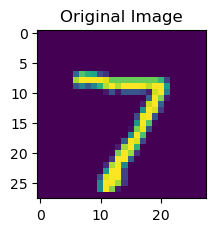

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(1, len(activations) + 1, 1)
plt.imshow(sample_image[0, 0].cpu(), cmap='viridis')
plt.title("Original Image")

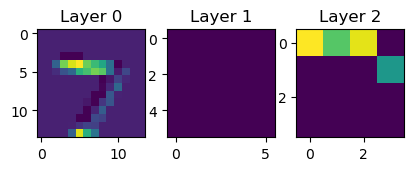

In [26]:
for i, activation in enumerate(activations):
    plt.subplot(1, len(activations) + 1, i+2)
    plt.imshow(activation[0, 0].cpu().detach(), cmap='viridis')
    plt.title(f'Layer {layer_indices[i]}')

plt.show()